# Lab 6

**How you will be graded**

This activity is out of 10 points. You will be graded on three things: completion, clear documentation, and correctness of your process.

* *Completion (4pts)*: This is solely whether you attempted and completed all portions of the computational assignment.
* *Documentation (4pts)*: Write comments above your code, describing what it does to demonstrate that you understand what the code is doing.
* *Correctness (2pts)*: Does your code run and produce the correct output?


# Playground!

In this section you will be given a set of tasks to complete on your own, and you will have to figure out how to do them using the resources provided (videos, documentation, etc). This way you can learn at your own pace and also get used to looking up documentation and learning how to use new tools on your own.

Note: We will have periodic check-ins through the class, just to make sure everyone atleast finishes a part of the activity before moving on!

The very first task is to import the required packages, this lab we will import a dataset, create a network out of it, use this graph to generate some random networks and finally compare these random networks to our original graph.

Try importing the required libraries below (dont forget you can use the `as` keyword to give them a shorter alias):

In [5]:
# TODO: Importing required packages
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import polars as pl

# 1. The data
Our dataset of choice today is the `worm connectome`, below is the description from its website:

Networks among neurons of both the adult male and adult hermaphrodite worms C. elegans, constructed from electron microscopy series, to include directed edges (chemical) and undirected (gap junction), and spanning including nodes for muscle and non-muscle end organs.1

For chemical connections, directed edges go from pre-synaptic cell to post-synaptic cell.

The 'connectivity' edge property corresponds to the total number of EM serial sections of connectivity, taking into account both the number of synapses and the sizes of synapses.

To provide complete coverage of the entire nervous system, the data are assembled from multiple animals and include connections added by extrapolation in gaps where no data were available.

For 'synapse' data the edge property 'synapses' contain the number of synapses scored between each pair of cells. These networks differ from the others in not taking into account the sizes of synapses and in showing only connections scored on electron micrographs. It does not include any connections inserted by extrapolation. Thus there are cells showing no connection here that are connected in the the other matrices. Also note, there are more edges in these networks than the total number of synapses scored (synapse lists, Supplementary Information 3). This is because polyads are listed here more than once (once for each postsynaptic cell).

For this lab we will use an undirected male gap junction network for C. elegans.

The dataset contains information about the source and target, lets load the `.csv` file using polars.

In [6]:
# TODO: Fill the blanks to read your csv file

f = "edges_gj.csv" # define file path 
df = pl.read_csv(f)  # read csv into df 
print(df) # print df to verify 



shape: (1_758, 3)
┌────────┬────────┬──────────────┐
│ source ┆ target ┆ connectivity │
│ ---    ┆ ---    ┆ ---          │
│ i64    ┆ i64    ┆ i64          │
╞════════╪════════╪══════════════╡
│ 2      ┆ 0      ┆ 2            │
│ 3      ┆ 1      ┆ 1            │
│ 4      ┆ 1      ┆ 1            │
│ 5      ┆ 2      ┆ 1            │
│ 8      ┆ 3      ┆ 1            │
│ …      ┆ …      ┆ …            │
│ 582    ┆ 439    ┆ 3            │
│ 582    ┆ 579    ┆ 8            │
│ 582    ┆ 581    ┆ 7            │
│ 583    ┆ 439    ┆ 4            │
│ 584    ┆ 439    ┆ 10           │
└────────┴────────┴──────────────┘


# 2. Creating a graph

Lets use `nx.from_pandas_edgelist()` function we learnt in Lab 5 to load our data into a graph. 

Example usage:
```python
G = nx.from_pandas_edgelist(df, source = <source_node>, target = <target_node>)
# Here we first input the dataframe we want to use, the source argument specifies which column is being used for source node and target argument specifies the column name for target node.
nx.draw(G, node_color = 'red', node_size = 10, edgecolors='black', alpha = 0.7)
```

Try using this function to create and draw a graph of your dataframe.

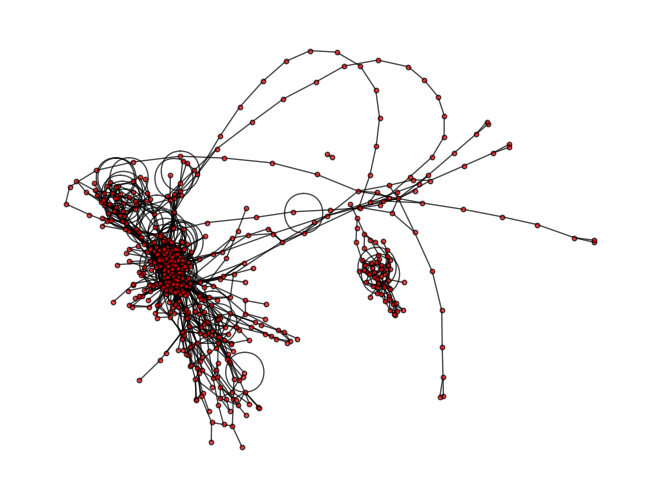

In [ ]:
# TODO: Fill the blanks to directly create a graph from your df

# read from pandas df for source, edge into G
G = nx.from_pandas_edgelist(df, source = 'source', target = 'target', edge_attr= 'connectivity') 

# TODO: Draw the graph (HINT: Look at the example code)

# draw graph defined above
nx.draw(G, node_color = 'red', node_size = 10, edgecolors ='black', alpha = 0.7)

# 3. Generating random graphs!
### 3.1 Why Generate Random Graphs?

Till now all our networks (including lab datasets, network of the day, and homeworks) have shown different properties - different clustering coefficients, different degree distributions, different path lengths. A fundamental question becomes: **Are these properties because of this specific graph? Or does any graph which looks similar show these properties?**

This is where random graphs come in. If we create a random graph loosely based on our original (same number of nodes, same density), we can test different statistics to check if they are unique to our structure or not.

Think of it like this:
- Our real protein network has a clustering coefficient of, say, 0.15
- Is 0.15 high? Low? Special in some way?
- We need a **baseline for comparison**

By generating, say, 100 random graphs with the same basic properties (n nodes, p density) and calculating their clustering coefficients, we can see:
- If our real network's clustering is **much higher** than random → there's something special about biological organization!
- If our real network's clustering is **similar to random** → maybe this structure just happens by chance

This helps us answer: **Are biological networks structured in a meaningful way, or are they just random connections?**

### 3.2 Erdős-Rényi random graph (GNP model)

The Erdős-Rényi model is the simplest random graph model. Here's how it works:

1. We add `n` nodes to our graph.
2. For each possible pair of nodes, we flip a coin with probability `p` of landing heads.
3. If we land on head (`P(heads) = p`) we add an edge between the nodes, otherwise we dont.

So every edge exists independently of others, with the probability `p`!

GNP stands for:
* G: Graph
* N: Number of nodes
* P: Probability of edge existing

In NetworkX, we use: `nx.fast_gnp_random_graph(n, p)` to generate such graphs.

We'll use the same `n` (number of nodes) and `p` (density) as our real network to make a fair comparison.

Try creating a single GNP graph and drawing it to see what it looks like!

Hint: Use `G.number_of_nodes()` and `nx.density(G)` to find `n` and `p`

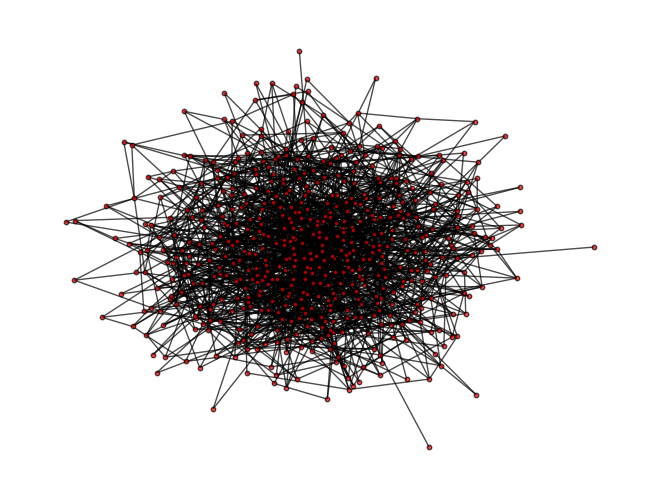

In [ ]:
# TODO: Define `n` and `p`
n = G.number_of_nodes() # num nodes
p = nx.density(G) # density 

# TODO: Add the missing arguments
G_gnp = nx.fast_gnp_random_graph(n, p)

nx.draw(G_gnp, node_color = 'red', node_size = 10, edgecolors='black', alpha = 0.7)

### 3.3 Plotting our stats!
Now let's generate multiple random graphs using a loop and see how much their properties vary. We can then compare them to our original graph to see if our graph is special or not!

For this exercise we will look at the **average clustering coefficient** for the network, calculated using `nx.average_clustering()`.

**The goal:**
1. Define a variable `number_of_samples` (let's use 100)
2. Create an empty list to store clustering coefficients
3. Iterate through a for loop `number_of_samples` times
4. In each iteration:
   - Use the GNP model to generate a random graph using `n` and `p` from our original graph
   - Calculate the average clustering coefficient using `nx.average_clustering()`
   - Append this value to our list
5. After the loop finishes, plot the frequency distribution using `plt.hist()`

This will show us if our real network's clustering is typical for random graphs, or is it unusual?

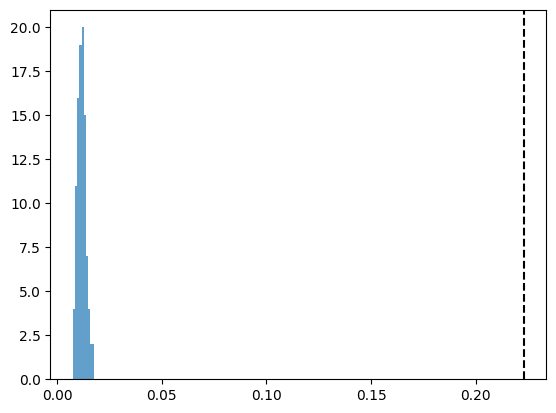

In [9]:
# TODO: Define `n` and `p`
n = G.number_of_nodes()
p = nx.density(G)

# TODO: Define `number_of_samples` and `ls_gnp`
number_of_samples = 100
ls_gnp = []

# TODO: What should be the range of this loop?
for i in range(number_of_samples):
    # TODO: Add arguments for GNP graph
    G_gnp = nx.fast_gnp_random_graph(n,p)

    # TODO: Append the property of choice to the list (you can choose your own as well!)
    ls_gnp.append(nx.average_clustering(G_gnp))

# TODO: What data are we supposed to use here?    
plt.hist(x = ls_gnp, alpha = 0.7)

# Uncomment to see how it compares to original Avg CC! (Change this if you want to compare another property)
plt.axvline(x = nx.average_clustering(G), color = 'black', linestyle = '--')
plt.show()

# 4. Preferential attachement

In GNP all nodes are treated equally, but do you think thats the case in real biological networks?

In reality, many biological networks have a few hubs, i.e., nodes with really high degrees. We saw some examples in the last lab!

So in such a network, are newer nodes more likely to interact with these hubs? The **Preferential Attachement** model works on this principle, high degree nodes are more likely to have new connection than low degree nodes!

Even though they have a different name, they are still generate RANDOM graphs. Using a different attachment algorithm for generation just enables us to check whether the attachement rules have something to do with our original network's structure.

### 4.1 The Barabási-Albert (BA) Model

The BA model works on preferential attachement, heres how it works:

1. Start with a small connected graph.
2. Add one node at a time till we reach `n` total nodes.
3. Each new node connects to `m` existing nodes (so each node creates `m` edges)
4. The probability of connecting to a node is proportional to its degree (well-connected nodes are more attractive!)

This creates a scale-free network! With a few nodes having very high degrees and most others having a relatively low degree.

In networkx, we can use `nx.barabasi_albert_graph(n, m)` to generate such graphs.

We'll set `m = number_of_edges / number_of_nodes` to match our original network's density.

Try creating a single BA graph and drawing it to see what it looks like!

Hint: `m` should be an integer, use `m=int(G.number_of_edges()/G.number_of_nodes())`

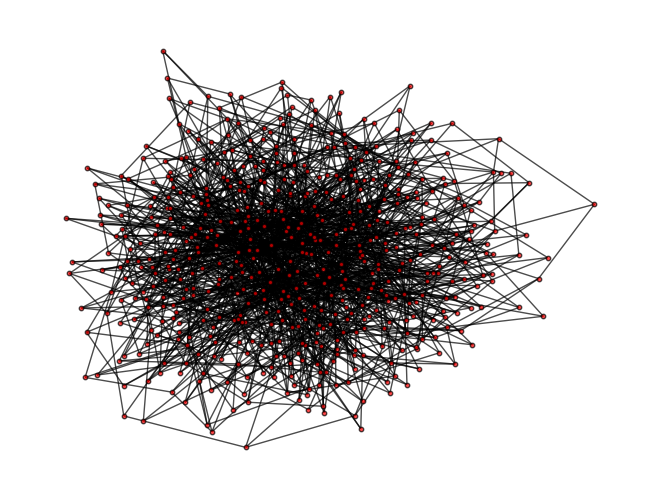

In [10]:
# TODO: Define `n` and `m`
n = G.number_of_nodes()
m = int(G.number_of_edges()/G.number_of_nodes())

# TODO: Add the missing arguments
G_ba = nx.barabasi_albert_graph(n, m)

nx.draw(G_ba, node_color = 'red', node_size = 10, edgecolors='black', alpha = 0.7)

### 4.2 Plotting our stats!

Same as before let's generate multiple BA graphs using a loop and see how much their properties vary. We can then compare them to our original graph to see if our graph is special or not!

We will again use **average clustering coefficient**, calculated using `nx.average_clustering()`, as our network property.

**The goal (same as before):**
1. Define a variable `number_of_samples` (let's use 100)
2. Create an empty list to store clustering coefficients
3. Iterate through a for loop `number_of_samples` times
4. In each iteration:
   - Use the BA model to generate a random graph using `n` and `m` from our original graph
   - Calculate the average clustering coefficient using `nx.average_clustering()`
   - Append this value to our list
5. After the loop finishes, plot the frequency distribution using `plt.hist()`

This will show us if our real network's clustering is typical for random graphs, or is it unusual?

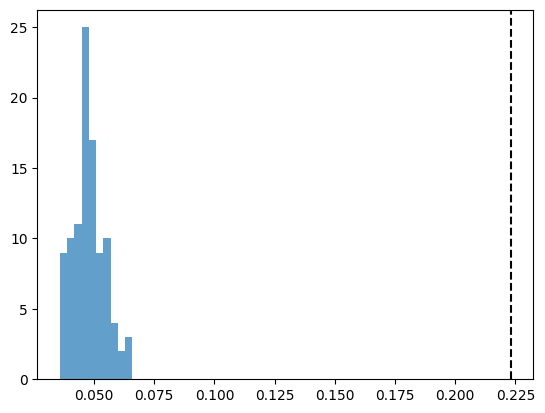

In [11]:
# TODO: Define `n` and `m`
n = G.number_of_nodes()
m = int(G.number_of_edges()/G.number_of_nodes())

# TODO: Define `number_of_samples` and `ls_ba`
number_of_samples = 100
ls_ba = []


# TODO: What should be the range of this loop?
for i in range(number_of_samples):
    # TODO: Add arguments for BA graph
    G_ba = nx.barabasi_albert_graph(n, m)

    # TODO: Append the property of choice to the list (you can choose your own as well!)
    ls_ba.append(nx.average_clustering(G_ba))
    
# TODO: What data are we supposed to use here?    
plt.hist(x = ls_ba, alpha = 0.7) 

# Uncomment to see how it compares to original Avg CC! (Change this if you want to compare another property)
plt.axvline(x = nx.average_clustering(G), color = 'black', linestyle = '--')
plt.show()

# 5. Drawing them together

Now lets actually compare GNP and BA models to see what emulates our actual data more closely.

**The goal:**
1. Define a variable `number_of_samples` (let's use 100)
2. Create two empty lists to store clustering coefficients, `ls_gnp` and `ls_ba`.
3. Iterate through a for loop `number_of_samples` times
4. In each iteration:
   - Use the GNP and BA model to generate a random graph using `n`, `p`, and `m` from our original graph
   - Calculate the average clustering coefficient using `nx.average_clustering()`
   - Append this value to the respective list.
5. After the loop finishes, plot both frequency distribution using `plt.hist()`, add label for each!
6. Add a vertical line showing where our real network's clustering falls using `plt.axvline()`

What do you observe? Which model is better at predicting our actual network?

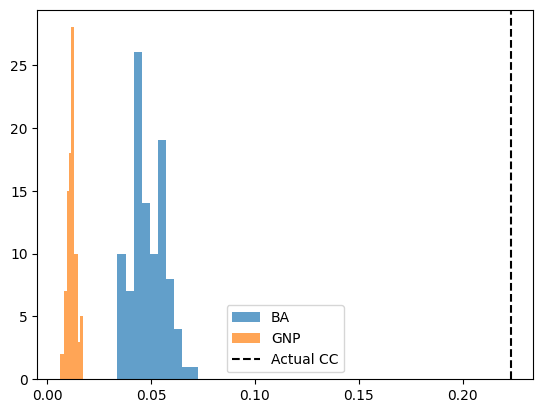

In [12]:
# TODO: Define number_of_samples
number_of_samples = 100

# TODO: Define your empty lists
ls_gnp = []
ls_ba = []

# TODO: Create a loop!
for i in range(number_of_samples): 
    # TODO: Create a PA graph
    G_ba = nx.barabasi_albert_graph(n, m)

    # TODO: Create a GNP graph
    G_gnp = nx.fast_gnp_random_graph(n, p)

    # TODO: Add the average CC (or your property of choice) to respective lists
    ls_ba.append(nx.average_clustering(G_ba))
    ls_gnp.append(nx.average_clustering(G_gnp))

# TODO: Plot histogram for BA graph  
plt.hist(ls_ba, alpha = 0.7, label = "BA") 

# TODO: Plot histogram for GNP graph  
plt.hist(ls_gnp, alpha = 0.7, label = "GNP")

# TODO: Create a vertical line for original average CC
plt.axvline(x = nx.average_clustering(G), color = 'black', linestyle = '--', label = 'Actual CC')

# Creating a legend and drawing the graph
plt.legend()
plt.show()

# Extra credit

Choose a property from the list below and plot a histogram with both GNP and BA model, also add a vertical line showing the property's mean value for the GNP model, BA model, and the original value.

The properties:
- Diameter
- Degree variance
- Average path length
- Density

You can choose upto two properties for 2 extra points (1 + 1 for each).